In [1]:
import gpustat
gpustat.print_gpustat()
import os
os.environ['CUDA_VISIBLE_DEVICES']='3'
import random
random.seed(0)
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten, Concatenate, Lambda
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras import backend as K
import seaborn as sns
sns.set(style="white", color_codes=True)

gpu-4-culture-plate-sm  Fri Jul 26 19:11:39 2019
[0] GeForce GTX 1080 | 26'C,   0 % |     0 /  8114 MB |
[1] GeForce GTX 1080 | 27'C,   0 % |  5333 /  8114 MB | thong(5323M)
[2] GeForce GTX 1080 | 25'C,   0 % |     0 /  8114 MB |
[3] GeForce GTX 1080 | 33'C,   0 % |     0 /  8114 MB |
[4] GeForce GTX 1080 | 58'C,  54 % |  1427 /  8114 MB | azlokapa(1417M)
[5] GeForce GTX 1080 | 63'C,  28 % |  1501 /  8114 MB | azlokapa(1491M)
[6] GeForce GTX 1080 | 28'C,   0 % |  3817 /  8114 MB | thong(3807M)
[7] GeForce GTX 1080 | 27'C,   0 % |     0 /  8114 MB |


Using TensorFlow backend.


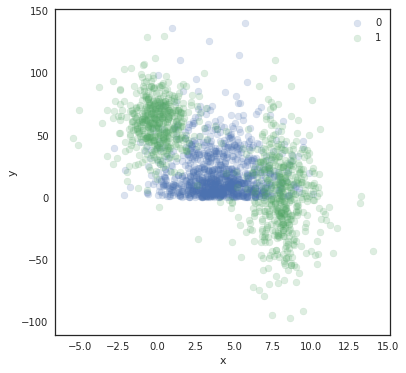

Number of data points:  2000


In [2]:
x0 = np.random.normal(4,2, (1000))
y0 = np.random.exponential(20, (1000))
w0 = np.ones(1000)
l0 = np.zeros(1000)

x11 = np.random.standard_t(4, (500))
x12 = np.random.standard_t(4, (500)) + 8
w11 = np.ones(500)
y11 = np.random.normal(60,20,(500))
y12 = np.random.normal(0,30,(500))
w12 = np.ones(500) 

x1 = np.concatenate((x11,x12))
y1 = np.concatenate((y11,y12))
w1 = np.concatenate((w11,w12))
l1 = np.ones(1000)

plt.figure(figsize=(6,6))
plt.scatter(x0,y0,alpha=0.2, label='0')
plt.scatter(x1,y1,alpha=0.2, label='1')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x = np.concatenate((x0,x1)).reshape(-1,1)
y = np.concatenate((y0,y1)).reshape(-1,1)
data = np.concatenate((x,y), axis=-1)
w = np.concatenate((w0,w1))
label = np.concatenate((l0,l1))

# Shuffle the dataset for training
idx = np.arange(len(data))
np.random.shuffle(idx)
data_train = data[idx]
w_train = w[idx]
label_train = label[idx]
print("Number of data points: ", len(x))

In [3]:
inputs = Input(shape=(2,))
hidden = Dense(1000, activation='relu')(inputs)
hidden = Dense(1000, activation='relu')(hidden)
output = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs, output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

model.fit(data_train,label_train, sample_weight=w_train, epochs=100, batch_size=100, verbose=1, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 1s 500us/step - loss: 1.0563 - val_loss: 0.6142
Epoch 2/100
1600/1600 [==============================] - 0s 40us/step - loss: 0.5849 - val_loss: 0.4792
Epoch 3/

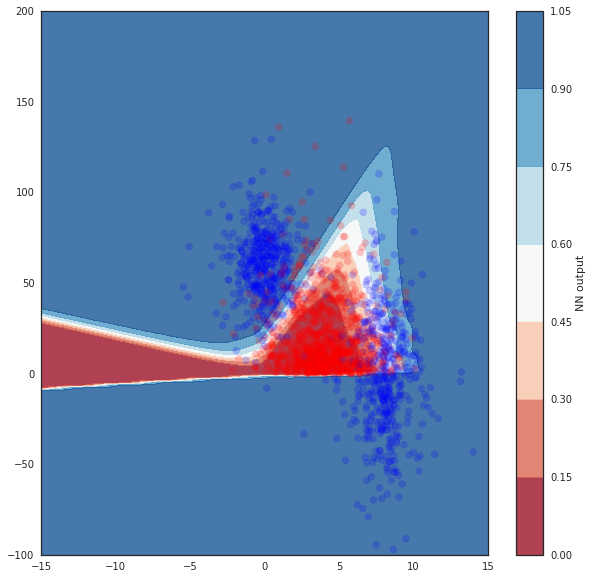

In [4]:
myXI, myYI = np.meshgrid(np.linspace(-15, 15, 200), np.linspace(-100, 200, 200))
myZI = model.predict(np.c_[myXI.ravel(), myYI.ravel()])
myZI = myZI.reshape(myXI.shape)

from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,10))

# plot contour map of NN output
# overlaid with test data points
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cont_plot = plt.contourf(myXI, myYI, myZI, cmap=cm, alpha=.8)
plt.scatter(data_train[:, 0], data_train[:, 1], c=label_train, cmap=cm_bright, alpha=0.2)
# ax.set_xlim(-2,2)
# ax.set_ylim(-2,2)
plt.colorbar(cont_plot,boundaries=[0,1],label='NN output')


Now if we change the weight of the second signal blob on the right to -1, what will happen?

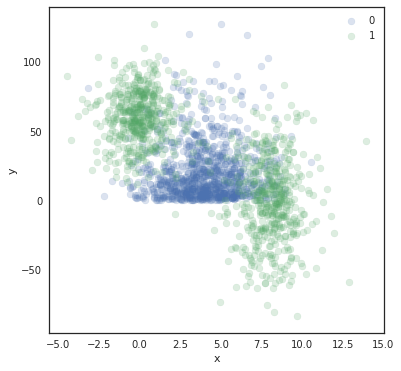

Number of data points:  2000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 0s 125us/step - loss: -2.3250 - val_loss: -3.7969
Epoch 2/100
1600/1600 [==============================] - 0s 40us/step - loss: -3.

In [5]:
x0 = np.random.normal(4,2, (1000))
y0 = np.random.exponential(20, (1000))
w0 = np.ones(1000)
l0 = np.zeros(1000)

x11 = np.random.standard_t(4, (500))
x12 = np.random.standard_t(4, (500)) + 8
w11 = np.ones(500)
y11 = np.random.normal(60,20,(500))
y12 = np.random.normal(0,30,(500))
w12 = -1*np.ones(500) # here

x1 = np.concatenate((x11,x12))
y1 = np.concatenate((y11,y12))
w1 = np.concatenate((w11,w12))
l1 = np.ones(1000)

plt.figure(figsize=(6,6))
plt.scatter(x0,y0,alpha=0.2, label='0')
plt.scatter(x1,y1,alpha=0.2, label='1')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x = np.concatenate((x0,x1)).reshape(-1,1)
y = np.concatenate((y0,y1)).reshape(-1,1)
data = np.concatenate((x,y), axis=-1)
w = np.concatenate((w0,w1))
label = np.concatenate((l0,l1))

# Shuffle the dataset for training
idx = np.arange(len(data))
np.random.shuffle(idx)
data_train = data[idx]
w_train = w[idx]
label_train = label[idx]
print("Number of data points: ", len(x))

inputs = Input(shape=(2,))
hidden = Dense(1000, activation='relu')(inputs)
hidden = Dense(1000, activation='relu')(hidden)
output = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs, output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

model.fit(data_train,label_train, sample_weight=w_train, epochs=100, batch_size=100, verbose=1, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          validation_split=0.2)

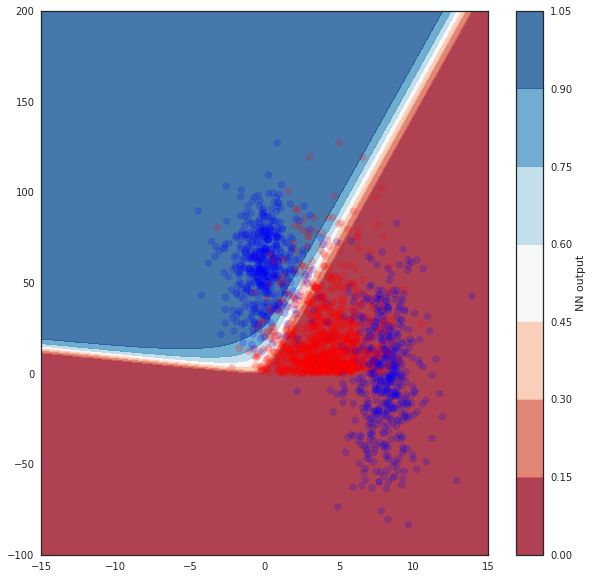

In [6]:
myXI, myYI = np.meshgrid(np.linspace(-15, 15, 200), np.linspace(-100, 200, 200))
myZI = model.predict(np.c_[myXI.ravel(), myYI.ravel()])
myZI = myZI.reshape(myXI.shape)

from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,10))

# plot contour map of NN output
# overlaid with test data points
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cont_plot = plt.contourf(myXI, myYI, myZI, cmap=cm, alpha=.8)
plt.scatter(data_train[:, 0], data_train[:, 1], c=label_train, cmap=cm_bright, alpha=0.2)
# ax.set_xlim(-2,2)
# ax.set_ylim(-2,2)
plt.colorbar(cont_plot,boundaries=[0,1],label='NN output')


The networks fully consider the second blob as background. Now what if the weight is 0?

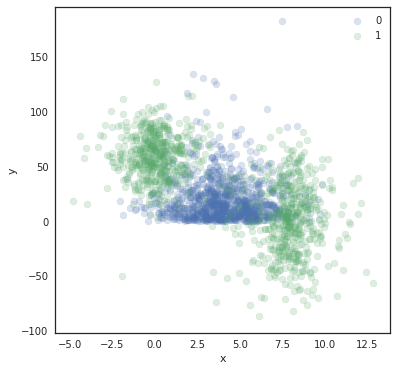

Number of data points:  2000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1001      
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 0s 138us/step - loss: 1.0869 - val_loss: 0.5777
Epoch 2/100
1600/1600 [==============================] - 0s 37us/step - loss: 0.259

In [7]:
x0 = np.random.normal(4,2, (1000))
y0 = np.random.exponential(20, (1000))
w0 = np.ones(1000)
l0 = np.zeros(1000)

x11 = np.random.standard_t(4, (500))
x12 = np.random.standard_t(4, (500)) + 8
w11 = np.ones(500)
y11 = np.random.normal(60,20,(500))
y12 = np.random.normal(0,30,(500))
w12 = 0.*np.ones(500) # here

x1 = np.concatenate((x11,x12))
y1 = np.concatenate((y11,y12))
w1 = np.concatenate((w11,w12))
l1 = np.ones(1000)

plt.figure(figsize=(6,6))
plt.scatter(x0,y0,alpha=0.2, label='0')
plt.scatter(x1,y1,alpha=0.2, label='1')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x = np.concatenate((x0,x1)).reshape(-1,1)
y = np.concatenate((y0,y1)).reshape(-1,1)
data = np.concatenate((x,y), axis=-1)
w = np.concatenate((w0,w1))
label = np.concatenate((l0,l1))

# Shuffle the dataset for training
idx = np.arange(len(data))
np.random.shuffle(idx)
data_train = data[idx]
w_train = w[idx]
label_train = label[idx]
print("Number of data points: ", len(x))

inputs = Input(shape=(2,))
hidden = Dense(1000, activation='relu')(inputs)
hidden = Dense(1000, activation='relu')(hidden)
output = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs, output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

model.fit(data_train,label_train, sample_weight=w_train, epochs=100, batch_size=100, verbose=1, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          validation_split=0.2)

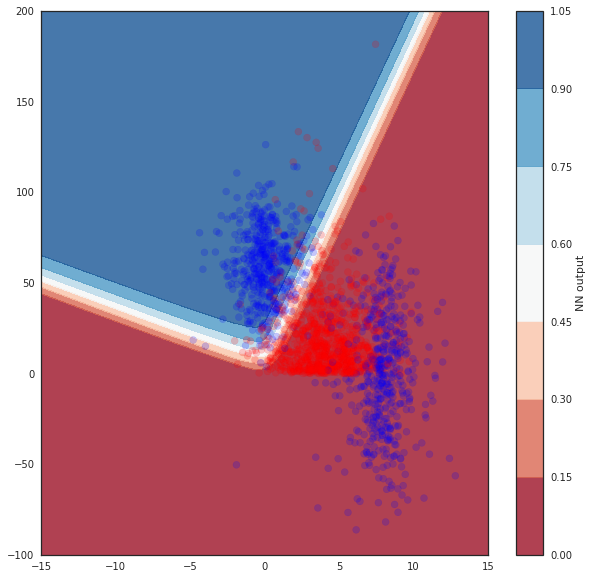

In [8]:
myXI, myYI = np.meshgrid(np.linspace(-15, 15, 200), np.linspace(-100, 200, 200))
myZI = model.predict(np.c_[myXI.ravel(), myYI.ravel()])
myZI = myZI.reshape(myXI.shape)

from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,10))

# plot contour map of NN output
# overlaid with test data points
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cont_plot = plt.contourf(myXI, myYI, myZI, cmap=cm, alpha=.8)
plt.scatter(data_train[:, 0], data_train[:, 1], c=label_train, cmap=cm_bright, alpha=0.2)
# ax.set_xlim(-2,2)
# ax.set_ylim(-2,2)
plt.colorbar(cont_plot, boundaries=[0,1],label='NN output')


We could interpret this as the second blob doesn't exist. Now I'll set it to 0.7

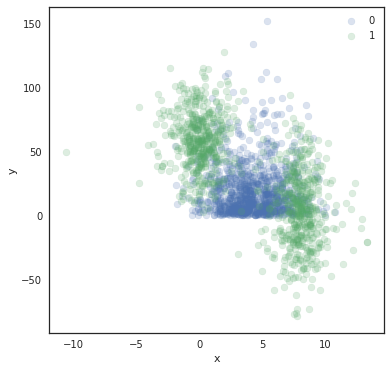

Number of data points:  2000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1001      
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________
Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 0s 150us/step - loss: 1.5161 - val_loss: 0.6381
Epoch 2/100
1600/1600 [==============================] - 0s 38us/step - loss: 0.636

In [9]:
x0 = np.random.normal(4,2, (1000))
y0 = np.random.exponential(20, (1000))
w0 = np.ones(1000)
l0 = np.zeros(1000)

x11 = np.random.standard_t(4, (500))
x12 = np.random.standard_t(4, (500)) + 8
w11 = np.ones(500)
y11 = np.random.normal(60,20,(500))
y12 = np.random.normal(0,30,(500))
w12 = 0.7*np.ones(500) # here

x1 = np.concatenate((x11,x12))
y1 = np.concatenate((y11,y12))
w1 = np.concatenate((w11,w12))
l1 = np.ones(1000)

plt.figure(figsize=(6,6))
plt.scatter(x0,y0,alpha=0.2, label='0')
plt.scatter(x1,y1,alpha=0.2, label='1')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x = np.concatenate((x0,x1)).reshape(-1,1)
y = np.concatenate((y0,y1)).reshape(-1,1)
data = np.concatenate((x,y), axis=-1)
w = np.concatenate((w0,w1))
label = np.concatenate((l0,l1))

# Shuffle the dataset for training
idx = np.arange(len(data))
np.random.shuffle(idx)
data_train = data[idx]
w_train = w[idx]
label_train = label[idx]
print("Number of data points: ", len(x))

inputs = Input(shape=(2,))
hidden = Dense(1000, activation='relu')(inputs)
hidden = Dense(1000, activation='relu')(hidden)
output = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs, output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

model.fit(data_train,label_train, sample_weight=w_train, epochs=100, batch_size=100, verbose=1, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          validation_split=0.2)

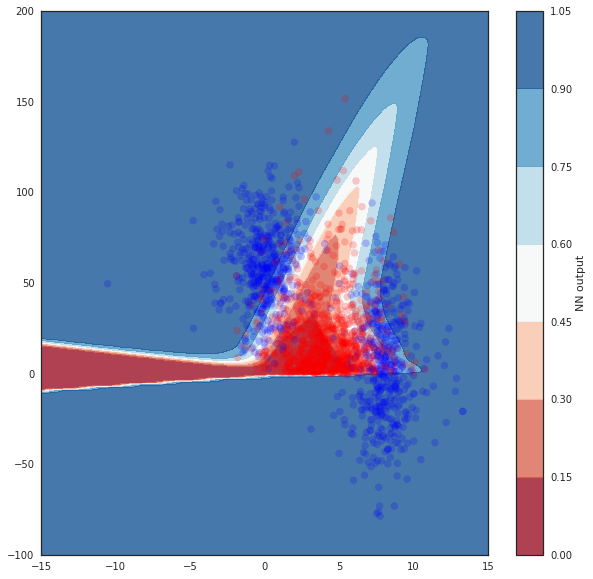

In [10]:
myXI, myYI = np.meshgrid(np.linspace(-15, 15, 200), np.linspace(-100, 200, 200))
myZI = model.predict(np.c_[myXI.ravel(), myYI.ravel()])
myZI = myZI.reshape(myXI.shape)

from matplotlib.colors import ListedColormap
plt.figure(figsize=(10,10))

# plot contour map of NN output
# overlaid with test data points
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cont_plot = plt.contourf(myXI, myYI, myZI, cmap=cm, alpha=.8)
plt.scatter(data_train[:, 0], data_train[:, 1], c=label_train, cmap=cm_bright, alpha=0.2)
# ax.set_xlim(-2,2)
# ax.set_ylim(-2,2)
plt.colorbar(cont_plot, boundaries=[0,1],label='NN output')
